In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("insight-test.csv")

# Data Processing
## Overview of Data
We also want to ensure that NaN doesn't exist, they contain the same data counts and there is no missing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229847 entries, 0 to 229846
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 229847 non-null  int64  
 1   is_new                  229847 non-null  int64  
 2   time                    229847 non-null  object 
 3   voucher_type            38958 non-null   float64
 4   voucher_valid           41981 non-null   float64
 5   basket_amount           229847 non-null  float64
 6   voucher_max_amount      229847 non-null  float64
 7   voucher_percentage      229847 non-null  float64
 8   voucher_min_purchase    229847 non-null  float64
 9   voucher_amount          229847 non-null  float64
 10  trx_is_voucher          229847 non-null  int64  
 11  is_paid                 229847 non-null  int64  
 12  is_remitted             229847 non-null  int64  
 13  user_purchased_prior    229847 non-null  int64  
 14  num_voucher_errors  

## Handle Missing Vouchers
Since users without a valid vouchers are marked as 0, we will assume empty vouchers users doesn't hold any vouchers

In [4]:
data["voucher_type"].value_counts()

1.0    31969
0.0     6989
Name: voucher_type, dtype: int64

In [5]:
data["voucher_valid"].value_counts()

1.0    38958
0.0     3023
Name: voucher_valid, dtype: int64

In [6]:
data["voucher_type"] = data["voucher_type"].fillna(0)
data["voucher_valid"] = data["voucher_valid"].fillna(0)

### Handle Marketing Tier
We want to replace the `Tier_n to n`

We notice that the data is missing, since it is dangerous to assume anything. We will just remove it for now

In [7]:
data["marketing_tier"].value_counts()

tier_1    153695
tier_2     64509
tier_3     10688
tier_4       179
Name: marketing_tier, dtype: int64

In [8]:
data["marketing_tier"] = data["marketing_tier"].replace({
                                                    'tier_1': 1,
                                                    'tier_2': 2,
                                                    'tier_3': 3,
                                                    'tier_4': 4
                                                })

Remove the rows containing NaN values

In [9]:
data = data[data['marketing_tier'].notna()]

## Handle Time Data
We want to convert the string into readable datetime

In [10]:
data["time"] = pd.to_datetime(data["time"])
data["account_created_at"] = pd.to_datetime(data["account_created_at"])

As some visualisation are hard with timeseries, we will convert them into:

`time` : `time_month`, `time_day` # The transaction are all in 2015

`account_created_at` : `account_age` # In Days

In [11]:
data["time_month"] = data["time"].dt.month
data["time_day"] = data["time"].dt.day

data["account_age"] = (data["time"] - data["account_created_at"]).dt.days

## Drop Unused Columns


In [12]:
data = data.drop(columns=['time', 'account_created_at', 'user_id'])

# Data Visualisation
## Pearson Correlation of Features
The result ranges in -1 to 1: 1 shows a perfect correlation, 0 shows no correlation, -1 shows an opposite perfect correlation

<AxesSubplot:>

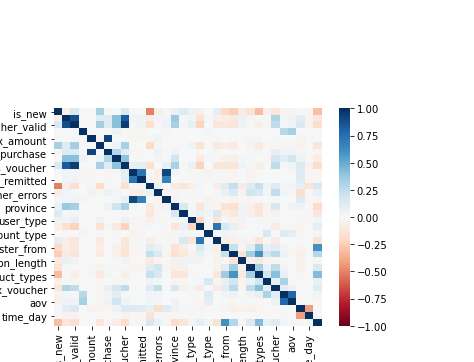

In [13]:
sns.heatmap(data.corr(), cmap=plt.cm.RdBu, vmin=-1, vmax=1)

In [14]:
data.corr().style.background_gradient(cmap=plt.cm.RdBu, vmin=-1, vmax=1).set_precision(2)

,is_new,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,marketing_tier,user_type,user_group,account_type,referrer_type,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov,time_month,time_day,account_age
is_new,1.00,-0.05,0.16,-0.01,-0.01,0.33,-0.01,0.00,0.16,0.01,0.00,-0.50,-0.07,0.02,0.07,0.13,0.06,-0.06,0.01,0.09,-0.20,-0.25,-0.08,-0.15,-0.31,-0.05,-0.12,-0.03,-0.03,0.02,-0.01,-0.30
voucher_type,-0.05,1.00,0.89,0.01,-0.00,0.13,0.14,0.42,0.84,0.03,0.04,-0.07,0.03,0.04,0.37,0.02,0.04,-0.15,0.01,-0.06,-0.07,-0.08,0.07,0.03,0.01,-0.01,0.30,0.03,0.06,0.11,-0.04,-0.10
voucher_valid,0.16,0.89,1.00,0.01,-0.00,0.34,0.13,0.42,0.95,0.03,0.04,-0.17,0.02,0.04,0.33,0.03,0.07,-0.22,0.00,-0.12,-0.11,-0.13,0.04,-0.00,-0.06,-0.02,0.25,0.02,0.05,0.16,-0.05,-0.17
basket_amount,-0.01,0.01,0.01,1.00,-0.00,-0.00,0.01,0.05,0.01,-0.01,-0.01,0.00,0.00,-0.01,0.01,-0.00,0.00,-0.00,0.04,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.00,0.01,0.28,0.33,0.00,-0.00,0.00
voucher_max_amount,-0.01,-0.00,-0.00,-0.00,1.00,-0.00,0.93,0.01,-0.00,-0.02,-0.01,-0.01,0.04,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,-0.00,0.02,0.02,0.00,0.01,0.00,0.00,-0.04,0.01,0.00
voucher_percentage,0.33,0.13,0.34,-0.00,-0.00,1.00,0.01,0.06,0.34,-0.00,0.00,-0.19,-0.01,0.01,-0.00,0.01,0.04,-0.14,-0.01,-0.10,-0.08,-0.09,0.01,-0.04,-0.10,-0.02,-0.02,-0.01,-0.01,-0.04,0.00,-0.12
voucher_min_purchase,-0.01,0.14,0.13,0.01,0.93,0.01,1.00,0.30,0.12,-0.02,-0.01,-0.01,0.06,-0.00,0.06,0.00,0.00,-0.02,0.00,-0.00,-0.01,-0.00,0.00,0.02,0.02,0.00,0.08,0.03,0.05,-0.02,0.02,-0.02
voucher_amount,0.00,0.42,0.42,0.05,0.01,0.06,0.30,1.00,0.40,-0.00,0.01,-0.01,0.02,0.02,0.20,0.00,0.01,-0.09,0.02,-0.01,-0.05,-0.06,0.02,0.02,0.00,-0.01,0.19,0.11,0.19,0.05,-0.01,-0.08
trx_is_voucher,0.16,0.84,0.95,0.01,-0.00,0.34,0.12,0.40,1.00,0.09,0.09,-0.16,0.01,0.08,0.32,0.02,0.07,-0.23,0.00,-0.12,-0.11,-0.13,0.04,-0.01,-0.06,-0.02,0.25,0.02,0.04,0.15,-0.04,-0.17
is_paid,0.01,0.03,0.03,-0.01,-0.02,-0.00,-0.02,-0.00,0.09,1.00,0.74,0.01,-0.07,0.91,0.03,0.00,-0.01,0.02,-0.03,0.02,-0.01,-0.03,-0.00,-0.03,-0.00,0.00,-0.00,0.00,-0.00,0.13,-0.02,-0.01


In [16]:
# sns.pairplot(data.sample(n = 100))

KeyboardInterrupt: 

# Data Exploration